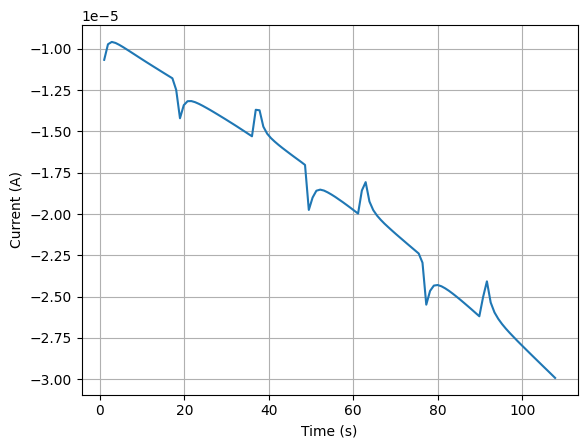

In [1594]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


file_path = "/Users/tomed/sscpraktikum/data/xray_detection/AuAu/Photocurrent_vs_time_10V_3_X_ray_pulses_50kV_79uA.dat"
data = pd.read_csv(file_path, sep = "\t")

time = data['Time (s)']
current = -data['Current (A)']


plt.plot(time, current)
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.show()

C:\Users\tomed\AppData\Local\Temp\ipykernel_9316\3192347224.py:22: OptimizeWarning: Covariance of the parameters could not be estimated
  params_exp, _ = curve_fit(exp_decay, time_fit, current_fit, maxfev=2000)


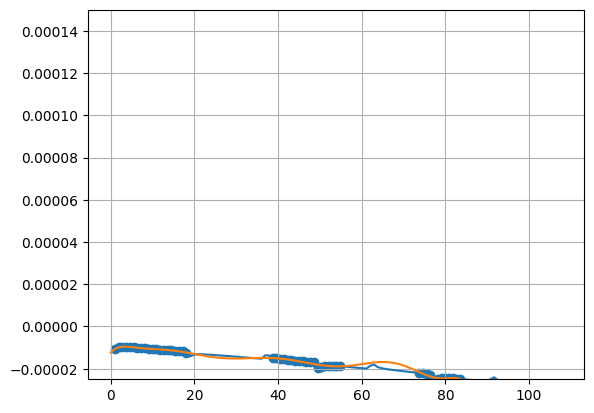

In [1595]:
first_n = 20
last_n = 7
time_fit = np.concatenate([
    time[0:first_n],
    time[42:61], 
    time[81:93],
     #time[111:126]
    ]) # fitting intervals
current_fit = np.concatenate([
    current[0:first_n], 
    current[42:61], 
    current[81:93],
      #current[111:126]
     ])

def exp_decay(x, a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p):
    return    m*x**11 + l*x**10 + k*x**9 + a*x**8 + b*x**7 + c*x**6 + d*x**5 + e*x**4 + f*x**3 + g*x**2 + i*x + j
# def exp_decay(x, a, b, c):
#     return a * np.exp(-b*x) + c


params_exp, _ = curve_fit(exp_decay, time_fit, current_fit, maxfev=2000)

time_linspace = np.linspace(0, np.max(time), num = np.size(time)) # fit until when? 

fit = exp_decay(time_linspace, *params_exp)
curren = current - fit

plt.plot(time, current)
plt.plot(time_linspace, fit)
plt.scatter(time_fit, current_fit)
plt.grid(True)
plt.ylim(-0.25e-4, 1.5e-4)
plt.show()

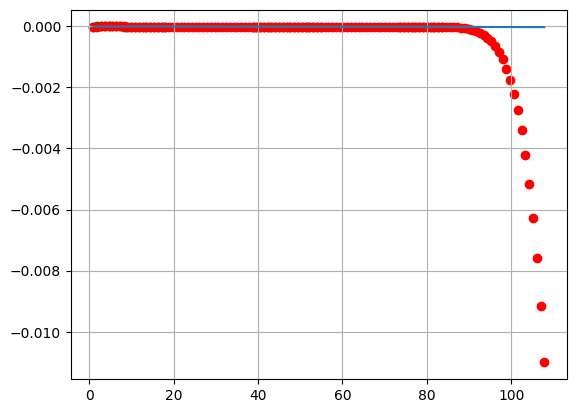

In [1596]:
plt.plot(time, current)
plt.scatter(time_fit, current_fit, color = 'green')
plt.scatter(time, fit, color = 'red')
plt.grid(True)
plt.show()

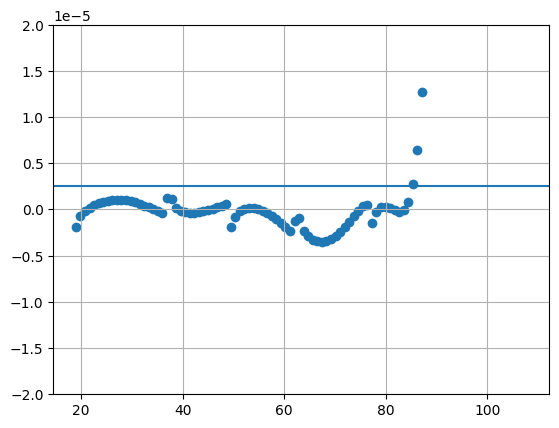

In [1597]:
randomline = 0e-6

curry = curren[20:]
plt.scatter(time[20:], curry)
plt.axhline(y= 0.25e-5)
plt.grid(True)
plt.ylim(-2e-5, 0.2e-4)
plt.show()

In [1598]:
photocurrent = np.mean(curry[(time > 70) & (curry > 0.25e-5) & (curry < 1e-5)]) - np.mean(curry[(time > 70) & (curry < 0.25e-5) & (curry > -0.5e-4)])
# play with the time
photocurrent

#with open("shit.txt", "a")


np.float64(5.122396614503474e-06)

Fitted parameters:
I0 = 1.077957e-04
mu = 7.516814e+00
tau = 1.199992e-03


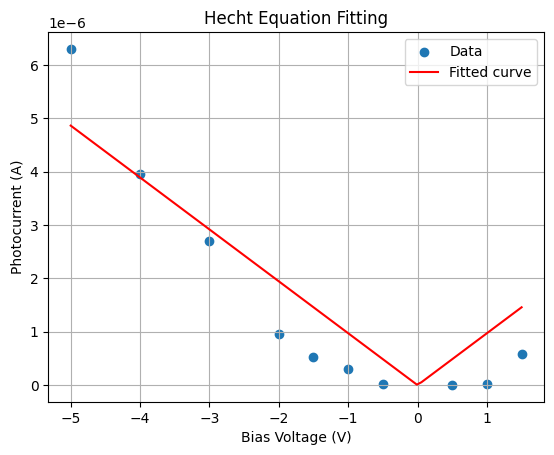

In [1599]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Input data
V_data = np.array([-0.5, -1, -1.5, -2, -3, -4, -5, 0.5, 1.5, 1])
I_data = np.array([
    2.431034476713694e-08, 
    3.0818487920042543e-07, 
    5.202867839387334e-07, 
    9.59519731042972e-07, 
    2.704298395474492e-06, 
    3.947785190565745e-06, 
    6.298093333388902e-06, 
    4.018717850699249e-09, 
    5.88143472319906e-07, 
    1.3621361752632845e-08
])

# Thickness of the semiconductor detector (assume some value if not provided)
d = 1.0

# Define the Hecht equation function
def hecht_equation(U, I0, mu, tau):
    U = np.abs(U)  # Handle negative bias voltages by taking absolute value
    return I0 * (mu * tau * U / d**2) * (1 - np.exp(-d**2 / (mu * tau * U)))

# Perform the curve fitting
initial_guess = [1.0e-07, 1.0e-02, 1.0e-06]  # Adjusted initial guesses for I0, mu, tau
popt, pcov = curve_fit(hecht_equation, V_data, I_data, p0=initial_guess)

# Extract the fitted parameters
I0_fit, mu_fit, tau_fit = popt

# Print the fitted parameters
print(f"Fitted parameters:\nI0 = {I0_fit:.6e}\nmu = {mu_fit:.6e}\ntau = {tau_fit:.6e}")

# Generate fitted values for plotting
V_fit = np.linspace(min(V_data), max(V_data), 100)
I_fit = hecht_equation(V_fit, *popt)

# Plot the data and the fitted curve
plt.scatter(V_data, I_data, label='Data')
plt.plot(V_fit, I_fit, label='Fitted curve', color='red')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Photocurrent (A)')
plt.legend()
plt.title('Hecht Equation Fitting')
plt.grid(True)
plt.show()
